In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')

In [2]:
df=pd.read_csv('probe.csv')
df.head()

,t,x,y,z,prank,etype,uidx,eidx,rho,u,v,w,p
0,3.211295e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.279629e-11,-9.923974e-13,89769.0
1,8.815134e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.869202e-11,-1.122913e-11,89769.0
2,1.647040e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,5.807815e-11,-2.223040e-11,89769.0
3,2.668280e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.084827e-11,-3.707606e-11,89769.0
4,4.028759e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.188746e-11,-5.721957e-11,89769.0


In [3]:
df.dtypes

t        float64
x        float64
y        float64
z        float64
prank      int64
etype     object
uidx       int64
eidx       int64
rho      float64
u        float64
v        float64
w        float64
p        float64
dtype: object

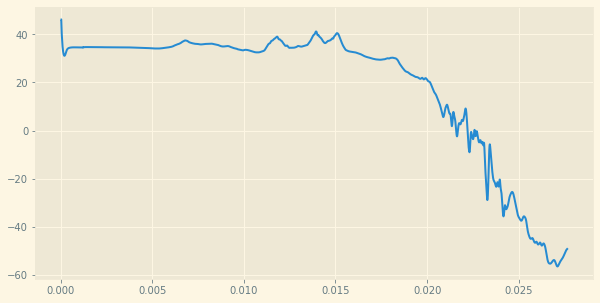

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df.t,df.u)

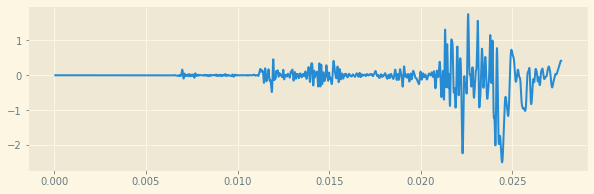

In [5]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.v)

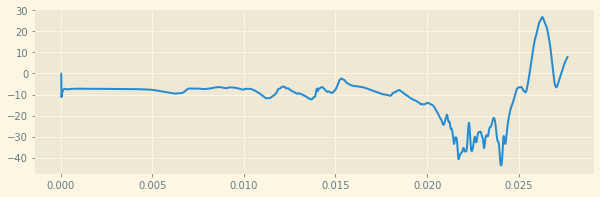

In [6]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.w)

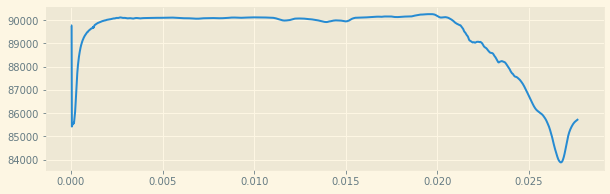

In [7]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.p)

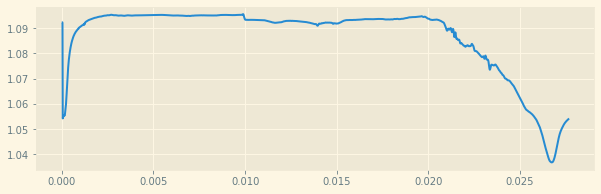

In [8]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.rho)

In [9]:
df.shape

(3802, 13)

## Univariate prediction
Predict _u_ velocity from its own time series.

In [10]:
# take 10 time steps and try to predict the 11th time step output
def df_to_x_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [[u] for u in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = df_as_np[i+window_size]
        y.append(outpt)
    return np.array(X),np.array(y)

In [11]:
ws=10
Uin,Uout = df_to_x_y(df['u'],ws)

In [12]:
Uin.shape

(3792, 10, 1)

In [13]:
x_train,y_train = Uin[:3000],Uout[:3000]
x_val,y_val = Uin[3000:3350],Uout[3000:3350]
x_test,y_test = Uin[3350:],Uout[3350:]

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [15]:
uvmodel = Sequential()
uvmodel.add(InputLayer((ws,1)))
uvmodel.add(LSTM(64))
uvmodel.add(Dense(16,'relu'))
uvmodel.add(Dense(1,'linear'))

uvmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
_________________________________________________________________


In [16]:
cpuv = ModelCheckpoint('model1/',save_best_only=True)
uvmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [17]:
uvmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[cpuv])

Epoch 1/50
93/94 [============================>.] - ETA: 0s - loss: 990.3509 - root_mean_squared_error: 31.4698

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 5s 39ms/step - loss: 990.1638 - root_mean_squared_error: 31.4669 - val_loss: 317.2489 - val_root_mean_squared_error: 17.8115
Epoch 2/50
84/94 [=========================>....] - ETA: 0s - loss: 926.8829 - root_mean_squared_error: 30.4448

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 922.2307 - root_mean_squared_error: 30.3682 - val_loss: 315.1966 - val_root_mean_squared_error: 17.7538
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 804.9719 - root_mean_squared_error: 28.3720 - val_loss: 317.6464 - val_root_mean_squared_error: 17.8226
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 573.8206 - root_mean_squared_error: 23.9546 - val_loss: 317.1284 - val_root_mean_squared_error: 17.8081
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 373.2790 - root_mean_squared_error: 19.3204 - val_loss: 316.9372 - val_root_mean_squared_error: 17.8027
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 262.1852 - root_mean_squared_error: 16.1921 - val_loss: 316.9944 - val_root_mean_squared_error: 17.8043
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 178.1081 - root_mean_squared_error: 13.3457 - val_loss: 31

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 1.4008 - root_mean_squared_error: 1.1835 - val_loss: 314.9732 - val_root_mean_squared_error: 17.7475
Epoch 21/50
83/94 [=========================>....] - ETA: 0s - loss: 1.2147 - root_mean_squared_error: 1.1021

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.1890 - root_mean_squared_error: 1.0904 - val_loss: 314.7819 - val_root_mean_squared_error: 17.7421
Epoch 22/50
91/94 [============================>.] - ETA: 0s - loss: 1.0305 - root_mean_squared_error: 1.0152

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 1.0213 - root_mean_squared_error: 1.0106 - val_loss: 314.4940 - val_root_mean_squared_error: 17.7340
Epoch 23/50
88/94 [===========================>..] - ETA: 0s - loss: 0.8898 - root_mean_squared_error: 0.9433

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.8866 - root_mean_squared_error: 0.9416 - val_loss: 314.2990 - val_root_mean_squared_error: 17.7285
Epoch 24/50
90/94 [===========================>..] - ETA: 0s - loss: 0.7561 - root_mean_squared_error: 0.8696

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.7747 - root_mean_squared_error: 0.8801 - val_loss: 314.0458 - val_root_mean_squared_error: 17.7213
Epoch 25/50
93/94 [============================>.] - ETA: 0s - loss: 0.6866 - root_mean_squared_error: 0.8286

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.6822 - root_mean_squared_error: 0.8259 - val_loss: 313.7826 - val_root_mean_squared_error: 17.7139
Epoch 26/50
91/94 [============================>.] - ETA: 0s - loss: 0.6102 - root_mean_squared_error: 0.7811

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.6058 - root_mean_squared_error: 0.7783 - val_loss: 313.5242 - val_root_mean_squared_error: 17.7066
Epoch 27/50
91/94 [============================>.] - ETA: 0s - loss: 0.5384 - root_mean_squared_error: 0.7338

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 0.5411 - root_mean_squared_error: 0.7356 - val_loss: 313.2654 - val_root_mean_squared_error: 17.6993
Epoch 28/50
85/94 [==========================>...] - ETA: 0s - loss: 0.4684 - root_mean_squared_error: 0.6844

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.4871 - root_mean_squared_error: 0.6979 - val_loss: 313.0050 - val_root_mean_squared_error: 17.6919
Epoch 29/50
93/94 [============================>.] - ETA: 0s - loss: 0.4442 - root_mean_squared_error: 0.6665

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.4410 - root_mean_squared_error: 0.6640 - val_loss: 312.7631 - val_root_mean_squared_error: 17.6851
Epoch 30/50
90/94 [===========================>..] - ETA: 0s - loss: 0.3778 - root_mean_squared_error: 0.6147

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 0.4009 - root_mean_squared_error: 0.6332 - val_loss: 312.4890 - val_root_mean_squared_error: 17.6774
Epoch 31/50
94/94 [==============================] - ETA: 0s - loss: 0.3662 - root_mean_squared_error: 0.6052

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.3662 - root_mean_squared_error: 0.6052 - val_loss: 312.2318 - val_root_mean_squared_error: 17.6701
Epoch 32/50
90/94 [===========================>..] - ETA: 0s - loss: 0.3275 - root_mean_squared_error: 0.5723

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.3365 - root_mean_squared_error: 0.5801 - val_loss: 311.9407 - val_root_mean_squared_error: 17.6618
Epoch 33/50
90/94 [===========================>..] - ETA: 0s - loss: 0.3065 - root_mean_squared_error: 0.5537

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.3106 - root_mean_squared_error: 0.5573 - val_loss: 311.6612 - val_root_mean_squared_error: 17.6539
Epoch 34/50
84/94 [=========================>....] - ETA: 0s - loss: 0.3029 - root_mean_squared_error: 0.5503

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.2873 - root_mean_squared_error: 0.5360 - val_loss: 311.3101 - val_root_mean_squared_error: 17.6440
Epoch 35/50
93/94 [============================>.] - ETA: 0s - loss: 0.2673 - root_mean_squared_error: 0.5170

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.2659 - root_mean_squared_error: 0.5157 - val_loss: 311.0376 - val_root_mean_squared_error: 17.6363
Epoch 36/50
94/94 [==============================] - ETA: 0s - loss: 0.2486 - root_mean_squared_error: 0.4986

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.2486 - root_mean_squared_error: 0.4986 - val_loss: 310.7248 - val_root_mean_squared_error: 17.6274
Epoch 37/50
88/94 [===========================>..] - ETA: 0s - loss: 0.2350 - root_mean_squared_error: 0.4848

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.2325 - root_mean_squared_error: 0.4821 - val_loss: 310.4138 - val_root_mean_squared_error: 17.6186
Epoch 38/50
92/94 [============================>.] - ETA: 0s - loss: 0.2210 - root_mean_squared_error: 0.4701

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.2184 - root_mean_squared_error: 0.4673 - val_loss: 310.0829 - val_root_mean_squared_error: 17.6092
Epoch 39/50
88/94 [===========================>..] - ETA: 0s - loss: 0.2123 - root_mean_squared_error: 0.4608

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.2051 - root_mean_squared_error: 0.4529 - val_loss: 309.6913 - val_root_mean_squared_error: 17.5980
Epoch 40/50
90/94 [===========================>..] - ETA: 0s - loss: 0.1831 - root_mean_squared_error: 0.4279

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 42ms/step - loss: 0.1943 - root_mean_squared_error: 0.4408 - val_loss: 309.3530 - val_root_mean_squared_error: 17.5884
Epoch 41/50
83/94 [=========================>....] - ETA: 0s - loss: 0.1906 - root_mean_squared_error: 0.4366

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.1846 - root_mean_squared_error: 0.4297 - val_loss: 309.0182 - val_root_mean_squared_error: 17.5789
Epoch 42/50
82/94 [=========================>....] - ETA: 0s - loss: 0.1713 - root_mean_squared_error: 0.4139

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.1736 - root_mean_squared_error: 0.4166 - val_loss: 308.5963 - val_root_mean_squared_error: 17.5669
Epoch 43/50
83/94 [=========================>....] - ETA: 0s - loss: 0.1717 - root_mean_squared_error: 0.4143

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.1652 - root_mean_squared_error: 0.4065 - val_loss: 308.2234 - val_root_mean_squared_error: 17.5563
Epoch 44/50
85/94 [==========================>...] - ETA: 0s - loss: 0.1344 - root_mean_squared_error: 0.3666

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.1575 - root_mean_squared_error: 0.3969 - val_loss: 307.8962 - val_root_mean_squared_error: 17.5470
Epoch 45/50
83/94 [=========================>....] - ETA: 0s - loss: 0.1608 - root_mean_squared_error: 0.4011

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.1497 - root_mean_squared_error: 0.3869 - val_loss: 307.5185 - val_root_mean_squared_error: 17.5362
Epoch 46/50
85/94 [==========================>...] - ETA: 0s - loss: 0.1508 - root_mean_squared_error: 0.3883

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.1437 - root_mean_squared_error: 0.3790 - val_loss: 307.0774 - val_root_mean_squared_error: 17.5236
Epoch 47/50
84/94 [=========================>....] - ETA: 0s - loss: 0.1449 - root_mean_squared_error: 0.3807

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.1379 - root_mean_squared_error: 0.3713 - val_loss: 306.7270 - val_root_mean_squared_error: 17.5136
Epoch 48/50
90/94 [===========================>..] - ETA: 0s - loss: 0.1353 - root_mean_squared_error: 0.3678

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.1325 - root_mean_squared_error: 0.3640 - val_loss: 306.3246 - val_root_mean_squared_error: 17.5021
Epoch 49/50
83/94 [=========================>....] - ETA: 0s - loss: 0.1182 - root_mean_squared_error: 0.3438

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.1264 - root_mean_squared_error: 0.3555 - val_loss: 305.9018 - val_root_mean_squared_error: 17.4900
Epoch 50/50
93/94 [============================>.] - ETA: 0s - loss: 0.1229 - root_mean_squared_error: 0.3506

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.1220 - root_mean_squared_error: 0.3493 - val_loss: 305.5099 - val_root_mean_squared_error: 17.4788


In [18]:
from tensorflow.keras.models import load_model
uv_model = load_model('model1/')

In [19]:
train=uv_model.predict(x_train)#.flatten()
val=uv_model.predict(x_val)#.flatten()
test=uv_model.predict(x_test)#.flatten()

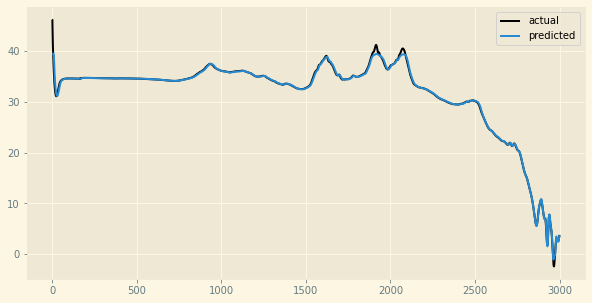

In [20]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.legend()

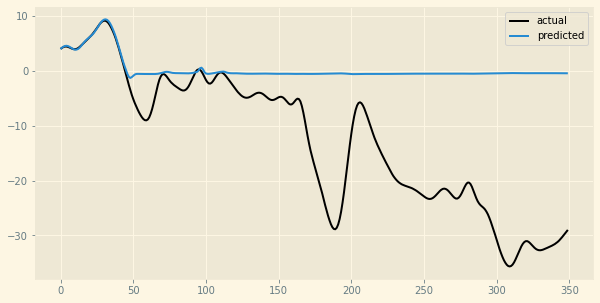

In [21]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.legend()

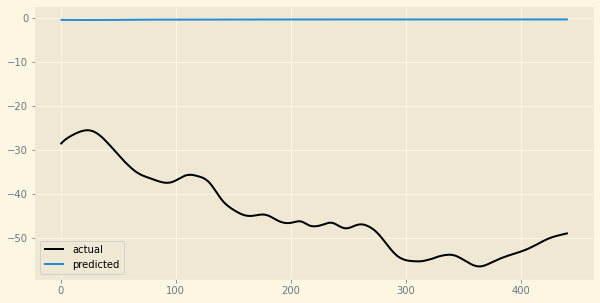

In [22]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.legend()

It is interesting to note that the model fails to predict negative values of _u_. This could be due to the fact that much of the training set has positive values of _u_ and the activation function. There are two ways to solve this issue. The first one is to increase the training set size to account for negative values also. But that is not a viable option as the dataset itself is for a short window. The other option is to apply a relevant scaling to keep all values positive. 

### Scaled velocity

In [23]:
# min-max scaling
df['U_scaled']=(df.u-df.u.min())/(df.u.max()-df.u.min())
ws=10
inU,outU = df_to_x_y(df['U_scaled'],ws)

In [24]:
u_train,y_train = inU[:3000],outU[:3000]
u_val,y_val = inU[3000:3350],outU[3000:3350]
u_test,y_test = inU[3350:],outU[3350:]

In [48]:
y_train[-1]

0.5868311350835063

In [49]:
df.iloc[3009,13]

0.5868311350835063

In [26]:
uvmodel.fit(u_train, y_train, validation_data=(u_val, y_val), epochs=50, callbacks=[cpuv])

Epoch 1/50
83/94 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0679

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 2/50
79/94 [========================>.....] - ETA: 0s - loss: 1.6063e-04 - root_mean_squared_error: 0.0127

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 1.5860e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 3/50
82/94 [=========================>....] - ETA: 0s - loss: 1.2822e-04 - root_mean_squared_error: 0.0113

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 1.2499e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 4/50
93/94 [============================>.] - ETA: 0s - loss: 9.1332e-05 - root_mean_squared_error: 0.0096

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 9.1212e-05 - root_mean_squared_error: 0.0096 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 5/50
91/94 [============================>.] - ETA: 0s - loss: 5.5719e-05 - root_mean_squared_error: 0.0075

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 5.5106e-05 - root_mean_squared_error: 0.0074 - val_loss: 7.2298e-04 - val_root_mean_squared_error: 0.0269
Epoch 6/50
86/94 [==========================>...] - ETA: 0s - loss: 3.1840e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 3.1001e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.1091e-04 - val_root_mean_squared_error: 0.0247
Epoch 7/50
89/94 [===========================>..] - ETA: 0s - loss: 2.5506e-05 - root_mean_squared_error: 0.0051

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 2.4967e-05 - root_mean_squared_error: 0.0050 - val_loss: 5.4761e-04 - val_root_mean_squared_error: 0.0234
Epoch 8/50
89/94 [===========================>..] - ETA: 0s - loss: 2.2299e-05 - root_mean_squared_error: 0.0047

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 2.1669e-05 - root_mean_squared_error: 0.0047 - val_loss: 4.7733e-04 - val_root_mean_squared_error: 0.0218
Epoch 9/50
82/94 [=========================>....] - ETA: 0s - loss: 1.8375e-05 - root_mean_squared_error: 0.0043

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.8772e-05 - root_mean_squared_error: 0.0043 - val_loss: 3.9703e-04 - val_root_mean_squared_error: 0.0199
Epoch 10/50
88/94 [===========================>..] - ETA: 0s - loss: 1.6661e-05 - root_mean_squared_error: 0.0041

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 1.6440e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.5794e-04 - val_root_mean_squared_error: 0.0189
Epoch 11/50
87/94 [==========================>...] - ETA: 0s - loss: 1.3990e-05 - root_mean_squared_error: 0.0037

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 1.4184e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.7952e-04 - val_root_mean_squared_error: 0.0167
Epoch 12/50
90/94 [===========================>..] - ETA: 0s - loss: 1.2575e-05 - root_mean_squared_error: 0.0035

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 1.2442e-05 - root_mean_squared_error: 0.0035 - val_loss: 2.4534e-04 - val_root_mean_squared_error: 0.0157
Epoch 13/50
87/94 [==========================>...] - ETA: 0s - loss: 1.0422e-05 - root_mean_squared_error: 0.0032

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1.0565e-05 - root_mean_squared_error: 0.0033 - val_loss: 2.2338e-04 - val_root_mean_squared_error: 0.0149
Epoch 14/50
87/94 [==========================>...] - ETA: 0s - loss: 9.2446e-06 - root_mean_squared_error: 0.0030

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 9.0376e-06 - root_mean_squared_error: 0.0030 - val_loss: 1.7786e-04 - val_root_mean_squared_error: 0.0133
Epoch 15/50
88/94 [===========================>..] - ETA: 0s - loss: 7.8884e-06 - root_mean_squared_error: 0.0028

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 7.6598e-06 - root_mean_squared_error: 0.0028 - val_loss: 1.5821e-04 - val_root_mean_squared_error: 0.0126
Epoch 16/50
86/94 [==========================>...] - ETA: 0s - loss: 6.5795e-06 - root_mean_squared_error: 0.0026

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 6.5289e-06 - root_mean_squared_error: 0.0026 - val_loss: 1.2605e-04 - val_root_mean_squared_error: 0.0112
Epoch 17/50
84/94 [=========================>....] - ETA: 0s - loss: 5.6230e-06 - root_mean_squared_error: 0.0024

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 5.5002e-06 - root_mean_squared_error: 0.0023 - val_loss: 1.0291e-04 - val_root_mean_squared_error: 0.0101
Epoch 18/50
86/94 [==========================>...] - ETA: 0s - loss: 4.8333e-06 - root_mean_squared_error: 0.0022

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.6539e-06 - root_mean_squared_error: 0.0022 - val_loss: 9.1589e-05 - val_root_mean_squared_error: 0.0096
Epoch 19/50
88/94 [===========================>..] - ETA: 0s - loss: 3.9941e-06 - root_mean_squared_error: 0.0020

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.9365e-06 - root_mean_squared_error: 0.0020 - val_loss: 7.4183e-05 - val_root_mean_squared_error: 0.0086
Epoch 20/50
87/94 [==========================>...] - ETA: 0s - loss: 3.0980e-06 - root_mean_squared_error: 0.0018

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.3143e-06 - root_mean_squared_error: 0.0018 - val_loss: 6.4140e-05 - val_root_mean_squared_error: 0.0080
Epoch 21/50
87/94 [==========================>...] - ETA: 0s - loss: 2.9394e-06 - root_mean_squared_error: 0.0017

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 2.8146e-06 - root_mean_squared_error: 0.0017 - val_loss: 5.1553e-05 - val_root_mean_squared_error: 0.0072
Epoch 22/50
88/94 [===========================>..] - ETA: 0s - loss: 2.4953e-06 - root_mean_squared_error: 0.0016

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 2.4138e-06 - root_mean_squared_error: 0.0016 - val_loss: 4.3906e-05 - val_root_mean_squared_error: 0.0066
Epoch 23/50
88/94 [===========================>..] - ETA: 0s - loss: 2.1423e-06 - root_mean_squared_error: 0.0015

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 2.1160e-06 - root_mean_squared_error: 0.0015 - val_loss: 3.9561e-05 - val_root_mean_squared_error: 0.0063
Epoch 24/50
88/94 [===========================>..] - ETA: 0s - loss: 1.7813e-06 - root_mean_squared_error: 0.0013

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.7995e-06 - root_mean_squared_error: 0.0013 - val_loss: 3.3891e-05 - val_root_mean_squared_error: 0.0058
Epoch 25/50
90/94 [===========================>..] - ETA: 0s - loss: 1.6246e-06 - root_mean_squared_error: 0.0013

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 1.6085e-06 - root_mean_squared_error: 0.0013 - val_loss: 3.1596e-05 - val_root_mean_squared_error: 0.0056
Epoch 26/50
88/94 [===========================>..] - ETA: 0s - loss: 1.4544e-06 - root_mean_squared_error: 0.0012

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 42ms/step - loss: 1.4346e-06 - root_mean_squared_error: 0.0012 - val_loss: 2.9321e-05 - val_root_mean_squared_error: 0.0054
Epoch 27/50
80/94 [========================>.....] - ETA: 0s - loss: 1.3445e-06 - root_mean_squared_error: 0.0012

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 1.3240e-06 - root_mean_squared_error: 0.0012 - val_loss: 2.8725e-05 - val_root_mean_squared_error: 0.0054
Epoch 28/50
93/94 [============================>.] - ETA: 0s - loss: 1.1509e-06 - root_mean_squared_error: 0.0011

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 1.2000e-06 - root_mean_squared_error: 0.0011 - val_loss: 2.7975e-05 - val_root_mean_squared_error: 0.0053
Epoch 29/50
91/94 [============================>.] - ETA: 0s - loss: 1.1546e-06 - root_mean_squared_error: 0.0011 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.1351e-06 - root_mean_squared_error: 0.0011 - val_loss: 2.7624e-05 - val_root_mean_squared_error: 0.0053
Epoch 30/50
94/94 [==============================] - ETA: 0s - loss: 1.1063e-06 - root_mean_squared_error: 0.0011 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 1.1063e-06 - root_mean_squared_error: 0.0011 - val_loss: 2.7608e-05 - val_root_mean_squared_error: 0.0053
Epoch 31/50
88/94 [===========================>..] - ETA: 0s - loss: 1.0584e-06 - root_mean_squared_error: 0.0010   

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 1.0471e-06 - root_mean_squared_error: 0.0010 - val_loss: 2.7607e-05 - val_root_mean_squared_error: 0.0053
Epoch 32/50
94/94 [==============================] - 0s 4ms/step - loss: 1.0025e-06 - root_mean_squared_error: 0.0010 - val_loss: 2.7950e-05 - val_root_mean_squared_error: 0.0053
Epoch 33/50
94/94 [==============================] - 0s 4ms/step - loss: 9.8528e-07 - root_mean_squared_error: 9.9261e-04 - val_loss: 2.8116e-05 - val_root_mean_squared_error: 0.0053
Epoch 34/50
94/94 [==============================] - 0s 4ms/step - loss: 9.7295e-07 - root_mean_squared_error: 9.8638e-04 - val_loss: 2.8620e-05 - val_root_mean_squared_error: 0.0053
Epoch 35/50
94/94 [==============================] - 0s 4ms/step - loss: 9.6641e-07 - root_mean_squared_error: 9.8306e-04 - val_loss: 2.8598e-05 - val_root_mean_squared_error: 0.0053
Epoch 36/50
94/94 [==============================] - 0s 4ms/step - loss: 9.7214e-07 - root_mean_squared_

In [27]:
uv_model = load_model('model1/')
train=uv_model.predict(u_train)
val=uv_model.predict(u_val)
test=uv_model.predict(u_test)

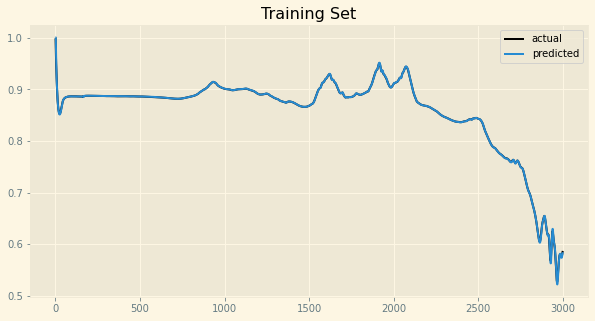

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.title('Training Set')
plt.legend()

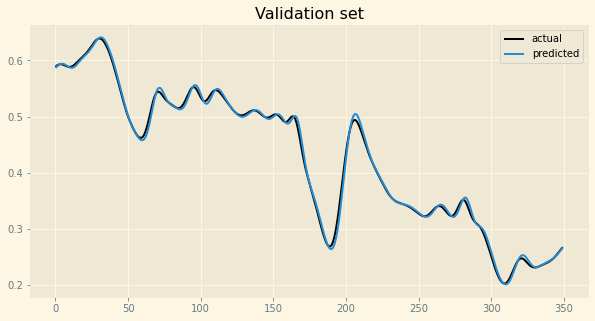

In [29]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.title('Validation set')
plt.legend()

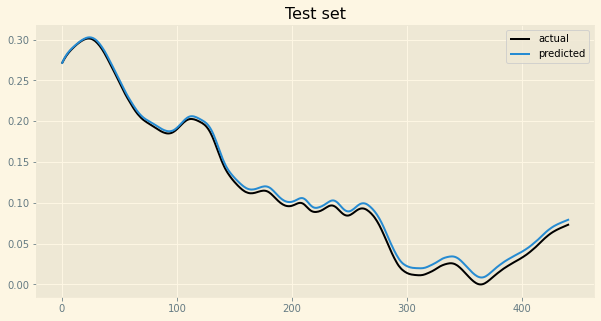

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.title('Test set')
plt.legend()

## Multivariate
Predict all velocity components and pressure from their time series.

In [31]:
def df_to_xn_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [var for var in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
        y.append(outpt)
    return np.array(X),np.array(y)

In [32]:
tdf=df[['u','v','w','p']]
tdf.u=(tdf.u-tdf.u.min())/(tdf.u.max()-tdf.u.min())
tdf.v=(tdf.v-tdf.v.min())/(tdf.v.max()-tdf.v.min())
tdf.w=(tdf.w-tdf.w.min())/(tdf.w.max()-tdf.w.min())
tdf.p=(tdf.p-tdf.p.min())/(tdf.p.max()-tdf.p.min())
var_in, var_out = df_to_xn_y(tdf)
var_in.shape, var_out.shape

((3792, 10, 4), (3792, 4))

In [33]:
np.max(var_out),np.min(var_out)

(1.0, 0.0)

In [34]:
in_train,out_train = var_in[:3000], var_out[:3000]
in_val,out_val = var_in[3000:3350], var_out[3000:3350]
in_test,out_test = var_in[3350:], var_out[3350:]
in_train.shape,out_train.shape

((3000, 10, 4), (3000, 4))

In [35]:
mvmodel = Sequential()
mvmodel.add(InputLayer((ws,4)))
mvmodel.add(LSTM(64))
mvmodel.add(Dense(16,'relu'))
mvmodel.add(Dense(4,'linear'))

mvmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17664     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 18,772
Trainable params: 18,772
Non-trainable params: 0
_________________________________________________________________


In [36]:
cpmv = ModelCheckpoint('model2/',save_best_only=True)
mvmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [37]:
mvmodel.fit(in_train, out_train, validation_data=(in_val, out_val), epochs=50, callbacks=[cpmv])

Epoch 1/50
93/94 [============================>.] - ETA: 0s - loss: 0.5210 - root_mean_squared_error: 0.7218

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 6s 44ms/step - loss: 0.5201 - root_mean_squared_error: 0.7212 - val_loss: 0.2021 - val_root_mean_squared_error: 0.4495
Epoch 2/50
85/94 [==========================>...] - ETA: 0s - loss: 0.2648 - root_mean_squared_error: 0.5146

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.2451 - root_mean_squared_error: 0.4951 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 3/50
90/94 [===========================>..] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0890

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1880
Epoch 4/50
81/94 [========================>.....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1847
Epoch 5/50
87/94 [==========================>...] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0535

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 6/50
89/94 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1784
Epoch 7/50
86/94 [==========================>...] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1748
Epoch 8/50
85/94 [==========================>...] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0468

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 9/50
82/94 [=========================>....] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0460

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 10/50
92/94 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0439

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1624
Epoch 11/50
91/94 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0417

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 12/50
86/94 [==========================>...] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0402

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1544
Epoch 13/50
85/94 [==========================>...] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0373

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1503
Epoch 14/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0362

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 38ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 15/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0348

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 16/50
83/94 [=========================>....] - ETA: 0s - loss: 9.4017e-04 - root_mean_squared_error: 0.0307

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0011 - root_mean_squared_error: 0.0324 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383
Epoch 17/50
85/94 [==========================>...] - ETA: 0s - loss: 9.8052e-04 - root_mean_squared_error: 0.0313

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 9.6129e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 18/50
83/94 [=========================>....] - ETA: 0s - loss: 8.7739e-04 - root_mean_squared_error: 0.0296

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 8.8447e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1325
Epoch 19/50
83/94 [=========================>....] - ETA: 0s - loss: 8.2744e-04 - root_mean_squared_error: 0.0288

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 8.1871e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1295
Epoch 20/50
81/94 [========================>.....] - ETA: 0s - loss: 7.7199e-04 - root_mean_squared_error: 0.0278

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 7.6519e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 21/50
85/94 [==========================>...] - ETA: 0s - loss: 7.2028e-04 - root_mean_squared_error: 0.0268

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 7.1964e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 22/50
83/94 [=========================>....] - ETA: 0s - loss: 6.6931e-04 - root_mean_squared_error: 0.0259

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 6.7847e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1223
Epoch 23/50
83/94 [=========================>....] - ETA: 0s - loss: 6.0480e-04 - root_mean_squared_error: 0.0246

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 6.4571e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 24/50
85/94 [==========================>...] - ETA: 0s - loss: 6.3768e-04 - root_mean_squared_error: 0.0253

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 6.2129e-04 - root_mean_squared_error: 0.0249 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 25/50
94/94 [==============================] - ETA: 0s - loss: 5.9717e-04 - root_mean_squared_error: 0.0244

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 5.9717e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1177
Epoch 26/50
83/94 [=========================>....] - ETA: 0s - loss: 5.8423e-04 - root_mean_squared_error: 0.0242

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 5.8133e-04 - root_mean_squared_error: 0.0241 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 27/50
81/94 [========================>.....] - ETA: 0s - loss: 5.8026e-04 - root_mean_squared_error: 0.0241

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 5.6736e-04 - root_mean_squared_error: 0.0238 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1148
Epoch 28/50
85/94 [==========================>...] - ETA: 0s - loss: 5.3547e-04 - root_mean_squared_error: 0.0231

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 5.5285e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 29/50
85/94 [==========================>...] - ETA: 0s - loss: 5.5153e-04 - root_mean_squared_error: 0.0235

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 5.4321e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1125
Epoch 30/50
84/94 [=========================>....] - ETA: 0s - loss: 5.4475e-04 - root_mean_squared_error: 0.0233

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 5.3387e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114
Epoch 31/50
82/94 [=========================>....] - ETA: 0s - loss: 5.2510e-04 - root_mean_squared_error: 0.0229

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 5.2428e-04 - root_mean_squared_error: 0.0229 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105
Epoch 32/50
82/94 [=========================>....] - ETA: 0s - loss: 5.3017e-04 - root_mean_squared_error: 0.0230

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 5.1695e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1097
Epoch 33/50
83/94 [=========================>....] - ETA: 0s - loss: 4.9740e-04 - root_mean_squared_error: 0.0223

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 5.1541e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1087
Epoch 34/50
87/94 [==========================>...] - ETA: 0s - loss: 5.2201e-04 - root_mean_squared_error: 0.0228

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 5.0716e-04 - root_mean_squared_error: 0.0225 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 35/50
88/94 [===========================>..] - ETA: 0s - loss: 5.1681e-04 - root_mean_squared_error: 0.0227

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 5.0226e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 36/50
82/94 [=========================>....] - ETA: 0s - loss: 4.8454e-04 - root_mean_squared_error: 0.0220

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.9270e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 37/50
87/94 [==========================>...] - ETA: 0s - loss: 4.9051e-04 - root_mean_squared_error: 0.0221

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.8800e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 38/50
87/94 [==========================>...] - ETA: 0s - loss: 4.8408e-04 - root_mean_squared_error: 0.0220

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.8573e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 39/50
86/94 [==========================>...] - ETA: 0s - loss: 4.8535e-04 - root_mean_squared_error: 0.0220

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.8006e-04 - root_mean_squared_error: 0.0219 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1050
Epoch 40/50
83/94 [=========================>....] - ETA: 0s - loss: 4.4696e-04 - root_mean_squared_error: 0.0211

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.7337e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 41/50
87/94 [==========================>...] - ETA: 0s - loss: 4.7072e-04 - root_mean_squared_error: 0.0217

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.6930e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1037
Epoch 42/50
87/94 [==========================>...] - ETA: 0s - loss: 4.6023e-04 - root_mean_squared_error: 0.0215

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.6073e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028
Epoch 43/50
85/94 [==========================>...] - ETA: 0s - loss: 4.2348e-04 - root_mean_squared_error: 0.0206

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.5425e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 44/50
85/94 [==========================>...] - ETA: 0s - loss: 4.5987e-04 - root_mean_squared_error: 0.0214

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.5237e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 45/50
83/94 [=========================>....] - ETA: 0s - loss: 4.5847e-04 - root_mean_squared_error: 0.0214

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.4460e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 46/50
93/94 [============================>.] - ETA: 0s - loss: 4.4065e-04 - root_mean_squared_error: 0.0210

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 4.3879e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 47/50
83/94 [=========================>....] - ETA: 0s - loss: 4.1258e-04 - root_mean_squared_error: 0.0203

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.3283e-04 - root_mean_squared_error: 0.0208 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 48/50
89/94 [===========================>..] - ETA: 0s - loss: 4.3864e-04 - root_mean_squared_error: 0.0209

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.2826e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 49/50
88/94 [===========================>..] - ETA: 0s - loss: 4.1540e-04 - root_mean_squared_error: 0.0204

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.2382e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
Epoch 50/50
87/94 [==========================>...] - ETA: 0s - loss: 4.2118e-04 - root_mean_squared_error: 0.0205

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.1474e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0978


In [38]:
mv_model = load_model('model2/')

In [39]:
from sklearn.metrics import mean_squared_error
def plot_predictions(model,x,y,set_label,sublabels):
    predictions = model.predict(x)
    rms=np.sqrt(mean_squared_error(y,predictions,multioutput='raw_values'))
    nsteps=y.shape[0]
    nvars=y.shape[1]
    ncols=1+(nvars>1)
    nrows=1+int((nvars-1)/2)
    
    fig,axs = plt.subplots(nrows,ncols,figsize=(ncols*8,nrows*5))
    
    if nrows<=1:
        for var in range(nvars):
            axs[var].plot(y[:,var],'k',label='actual')
            axs[var].plot(predictions[:,var],'r',label='predicted')
            axs[var].set_title(sublabels[var])
            axs[var].legend()
            print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
    
    else:
        var = 0
        for row in range(nrows):
            for col in range(ncols):
                axs[row][col].plot(y[:,var],'k',label='actual')
                axs[row][col].plot(predictions[:,var],'r',label='predicted')
                axs[row][col].set_title(sublabels[var])
                axs[row][col].legend()
                print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
                var+=1
    
    plt.suptitle(set_label)

RMS error in u prediction for Training set : 0.012
RMS error in v prediction for Training set : 0.031
RMS error in w prediction for Training set : 0.012
RMS error in p prediction for Training set : 0.020


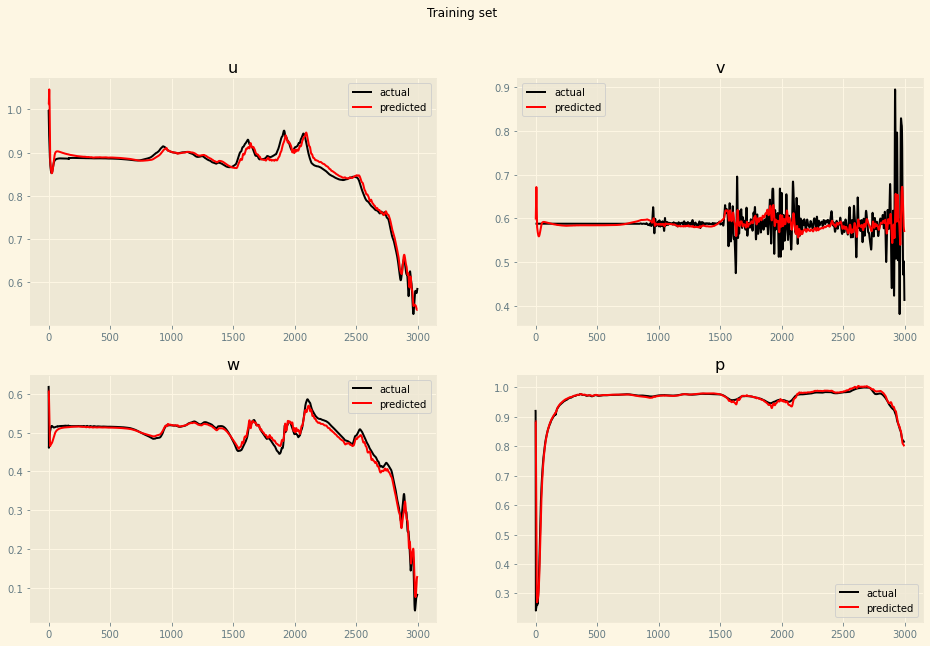

In [40]:
plot_predictions(mv_model,in_train,out_train,'Training set',['u','v','w','p'])

RMS error in u prediction for Validation set : 0.074
RMS error in v prediction for Validation set : 0.173
RMS error in w prediction for Validation set : 0.050
RMS error in p prediction for Validation set : 0.025


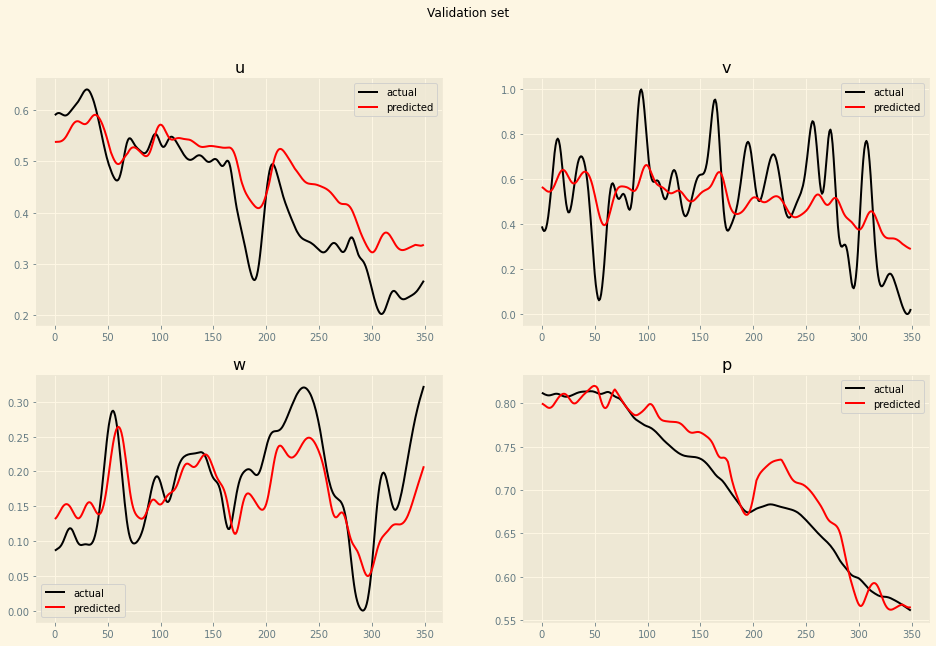

In [41]:
plot_predictions(mv_model,in_val,out_val,'Validation set',['u','v','w','p'])

RMS error in u prediction for Test set : 0.257
RMS error in v prediction for Test set : 0.254
RMS error in w prediction for Test set : 0.322
RMS error in p prediction for Test set : 0.080


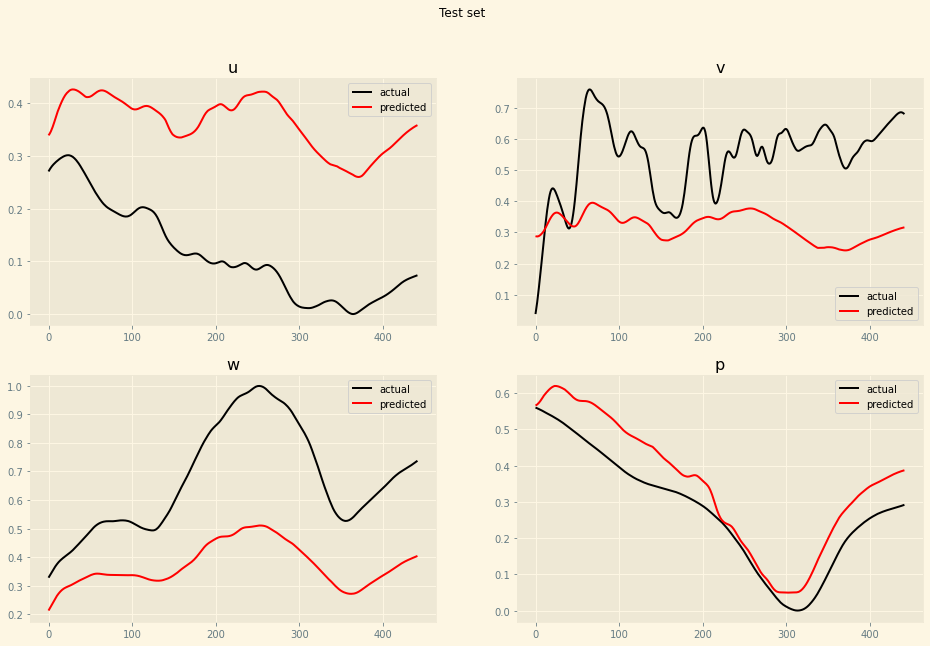

In [42]:
plot_predictions(mv_model,in_test,out_test,'Test set',['u','v','w','p'])

# Recursive prediction

In [57]:
rp_model = load_model('model1/')
non_train_data = df.iloc[3000+ws-1:,13].to_numpy()

In [51]:
from copy import deepcopy

In [81]:
predictions = []
inpt_series = deepcopy(u_train[-1])
for i in range(len(non_train_data)):
    inpt_series = np.reshape(inpt_series,(1,10,1))
    pred = rp_model.predict(inpt_series).flatten()
    #print(pred)
    predictions.append(pred)
    inpt_series = np.delete(inpt_series,0)
    inpt_series = np.append(inpt_series,pred)

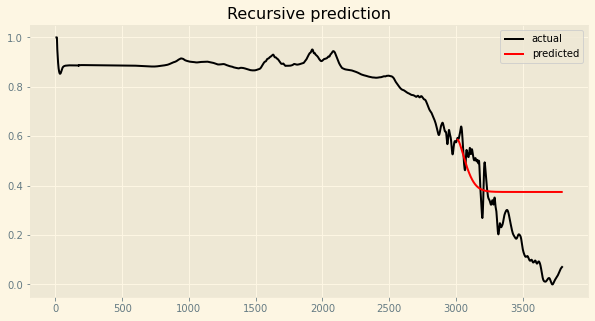

In [94]:
start_idx = 3000+ws-1
stop_idx = start_idx+len(non_train_data)
plt.figure(figsize=(10,5))
plt.plot(df['U_scaled'],'k',label='actual')
plt.plot(np.arange(start_idx,stop_idx),predictions,'r',label='predicted')
plt.title('Recursive prediction')
plt.legend()

# Multistep predictions